Mounted at /content/gdrive


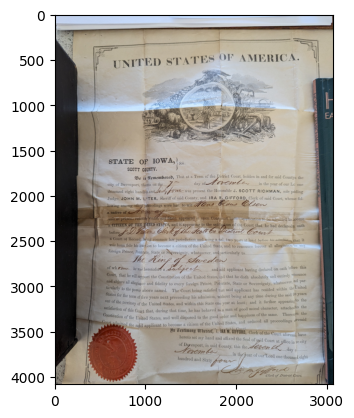

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Mount your Google Drive
drive.mount('/content/gdrive')

# Set the path to your image file on the shared drive
image_path = '/content/gdrive/MyDrive/ha-image/original_image_full.jpg'

img = mpimg.imread(image_path)

plt.imshow(img)

In [ ]:
image_path = '/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg'
preds_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform0_carlv_bbox.pkl'
font_path = '/content/gdrive/MyDrive/AIM/OpenSans-Regular.ttf'
overlay_image_pathA = '/content/gdrive/MyDrive/AIM/overlay_image_A.jpg'
overlay_image_pathB = '/content/gdrive/MyDrive/AIM/overlay_image_B.jpg'

Remaining list of words:
['united', 'states', 'america', 'ralling', 'luere', 'iowa', 'state', 'sss', 'cunty', 'scott', 'that', 'term', 'the', 'district', 'and', 'for', 'renteutbeted', 'court', 'holden', 'said', 'county', 'the', 'ovcm', 'elc', 'day', 'the', 'the', 'lord', 'davenport', 'theein', 'year', 'our', 'city', 'one', 'susty', 'fuw', 'hororable', 'richmany', 'the', 'scott', 'and', 'present', 'sole', 'thousand', 'eight', 'was', 'prsiding', 'hundre', 'and', 'sheriff', 'said', 'county', 'ira', 'gifford', 'clerk', 'said', 'court', 'lyter', 'whenthe', 'john', 'fol', 'judge', 'cans', 'olen', 'anws', 'had', 'towits', 'roceedings', 'lowing', 'other', 'were', 'among', 'native', 'cout', 'said', 'stater', 'appeared', 'lile', 'resian', 'open', 'icctolente', 'vltmm', 'aemitted', 'prcsens', 'oeceme', 'loc', 'and', 'the', 'satifaction', 'uited', 'states', 'appearing', 'the', 'court', 'thie', 'that', 'citizen', 'had', 'declaredn', 'oath', 'ssked', 'roadwo', 'oww', 'oouns', 'cot', 'before', 'juris

<ipython-input-9-7c81f700fe8a>:64: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, font)
<ipython-input-9-7c81f700fe8a>:64: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, font)
<ipython-input-9-7c81f700fe8a>:64: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, font)
<ipython-input-9-7c81f700fe8a>:64: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, font)
<ipython-input-9-7c81f700fe8a>:64: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, f

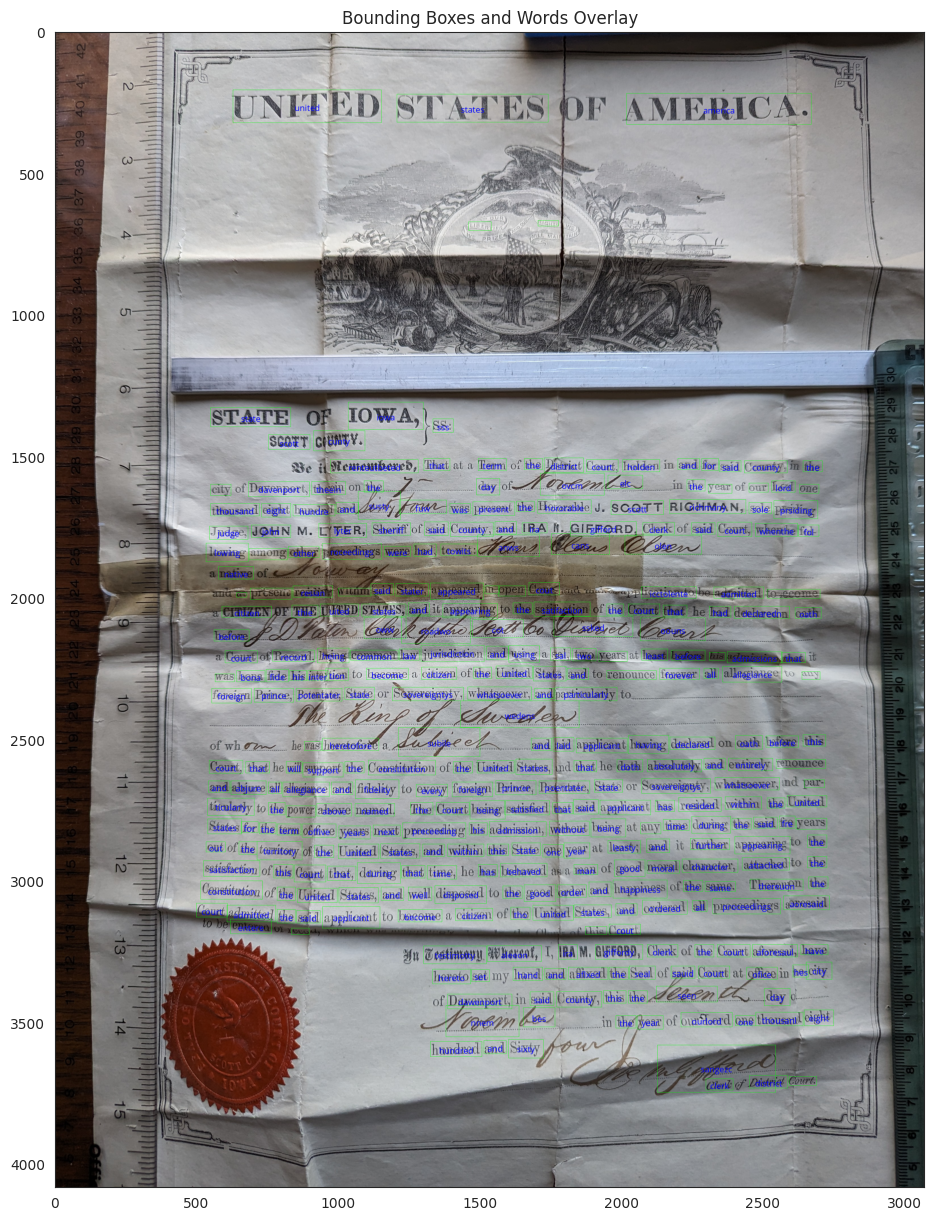

Count of bounding box/word overlays: 307


In [ ]:
# Model B
import pickle
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Load the pickle file
with open(preds_path, 'rb') as f:
    preds = pickle.load(f)

#Convert the data to a pandas DataFrame
preds_df = pd.DataFrame(preds, columns = ['word', 'upper_left_X', 'upper_left_Y', 'lower_left_X', 'lower_left_Y', 'lower_right_X', 'lower_right_Y', 'upper_right_X', 'upper_right_Y'])

#Filter words with less than 3 characters
preds_df = preds_df[preds_df.word.str.len() >= 3]

print("Remaining list of words:")
print(preds_df.word.tolist())

# Set the path to the image
#image_path = 'path/to/your/image.jpg'

#Load the image using PIL
img = Image.open(image_path)

#Create a new copy of the image for overlay
overlay = img.copy()

#Set the font and size for the text overlay
font = ImageFont.truetype(font_path, 30)

fig,(ax1) = plt.subplots(1,1, figsize=(15,15))
ax1.set_title("Bounding Boxes and Words Overlay")
sns.set_style("white")

count_overlays = 0

# Iterate over the rows of the DataFrame
for idx, row in preds_df.iterrows():

    # Extract the bounding box coordinates
    x1, y1 = row['upper_left_X'], row['upper_left_Y']
    x2, y2 = row['lower_left_X'], row['lower_left_Y']
    x3, y3 = row['lower_right_X'], row['lower_right_Y']
    x4, y4 = row['upper_right_X'], row['upper_right_Y']

    #Calculate the bounding box rectangle to draw
    min_x = min(x1, x2, x3, x4)
    max_x = max(x1, x2, x3, x4)
    min_y = min(y1, y2, y3, y4)
    max_y = max(y1, y2, y3, y4)

    # Draw the bounding box on the image
    draw = ImageDraw.Draw(overlay)
    draw.rectangle((min_x, min_y, max_x, max_y), outline=(0, 255, 0))


    # Ensure the text is within the bounding box
    text = row['word']
    text_size = draw.textsize(text, font)
    text_width, text_height = text_size
    #textwidth, textheight = draw.textbbox((x1, y1), text, font=font)
    # textbbox_val = draw.textbbox((x1, y1), text, font=font)
    # print(textbbox_val)
    # textwidth, textheight = textbbox_val

    if max_x - min_x > text_width and max_y - min_y > text_height:
        # Calculate the center position for text
        text_x = min_x + ((max_x - min_x) / 2) - (text_width / 2)
        text_y = min_y + ((max_y - min_y) / 2) - (text_height / 2)
        draw.text((text_x, text_y), text, (0, 0, 255), font=font)
        count_overlays += 1

#Display the imaged with the overlays
ax1.imshow(overlay)

plt.show()

print(f"Count of bounding box/word overlays: {count_overlays}")
overlay.save(overlay_image_pathB)

**garbage! (below)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
xform_bbox_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform0_carlv_bbox.txt'

In [ ]:
import pickle

with open(xform_bbox_path, "rb") as f:
    preds = pickle.load(f)

print(preds)

UnpicklingError: invalid load key, '['.

In [ ]:
import ast
def file_to_object(path):
    with open(path, 'r') as f:
        target_object = ast.literal_eval(f.read())
    return target_object
xform_bbox_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform0_carlv_bbox.txt'
preds = file_to_object(xform_bbox_path)
print(preds)

ValueError: malformed node or string on line 1: <ast.Call object at 0x7e4f486f35b0>

In [ ]:
import numpy as np
preds = [
    ('of', np.array([[1812.8906 ,  434.29688],
       [1972.2656 ,  434.29688],
       [1972.2656 ,  525.9375 ],
       [1812.8906 ,  525.9375 ]], dtype=np.float32)),
    ('america', np.array([[2039.0361 ,  440.46344],
       [2700.8264 ,  430.73114],
       [2702.342  ,  533.7752 ],
       [2040.5515 ,  543.5075 ]], dtype=np.float32)),
    ('states', np.array([[1221.82   ,  484.05478],
       [1766.906  ,  442.125  ],
       [1774.8046 ,  544.8047 ],
       [1229.7185 ,  586.73444]], dtype=np.float32)),
    ('united', np.array([[ 640.5678 ,  508.20175],
       [1172.9049 ,  472.71265],
       [1180.0449 ,  579.8147 ],
       [2621.7188, 4004.2969]], dtype=np.float32)),
    ('clerk', np.array([[2318.9062, 3968.4375],
       [2418.5156, 3968.4375],
       [2418.5156, 4004.2969],
       [2318.9062, 4004.2969]], dtype=np.float32)),
    ('f', np.array([[2422.5   , 3968.4375],
       [2470.3125, 3968.4375],
       [2470.3125, 4008.2812],
       [2422.5   , 4008.2812]], dtype=np.float32)),
    ('district', np.array([[2478.2812, 3968.4375],
       [2613.75  , 3968.4375],
       [2613.75  , 4004.2969],
       [2478.2812, 4004.2969]], dtype=np.float32)),
    ('court', np.array([[2621.7188, 3968.4375],
       [2725.3125, 3968.4375],
       [2725.3125, 4004.2969],
       [2621.7188, 4004.2969]], dtype=np.float32))
]

Mean Height: 58.09
Standard Deviation of Height: 23.38
Mean Width: 287.70
Standard Deviation of Width: 234.87


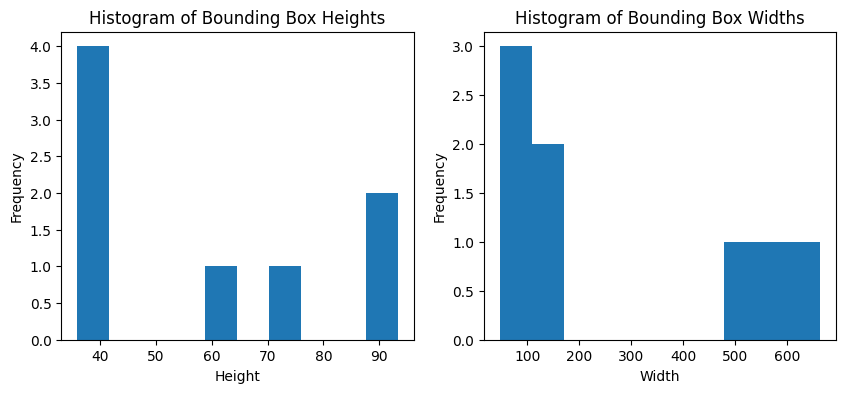

In [ ]:
# model A
# Collect heights and widths
heights = []
widths = []
for word, bbox in preds:
    top_left_y = bbox[0][1]
    top_left_x = bbox[0][0]
    bottom_right_y = bbox[2][1]
    bottom_right_x = bbox[2][0]

    heights.append(bottom_right_y - top_left_y)
    widths.append(bottom_right_x - top_left_x)

# Calculate mean, standard deviation
mean_height = np.mean(heights)
std_height = np.std(heights)
mean_width = np.mean(widths)
std_width = np.std(widths)

print(f"Mean Height: {mean_height:.2f}")
print(f"Standard Deviation of Height: {std_height:.2f}")
print(f"Mean Width: {mean_width:.2f}")
print(f"Standard Deviation of Width: {std_width:.2f}")

# Plot histograms
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(heights)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Heights')

plt.subplot(1, 2, 2)
plt.hist(widths)
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Widths')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from PIL import Image

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

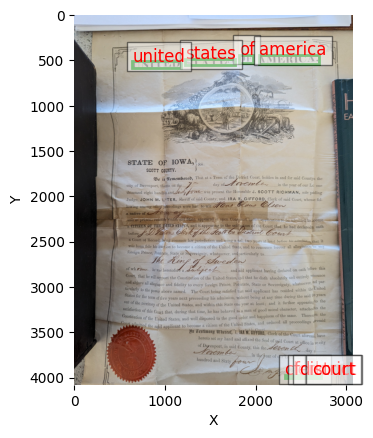

In [ ]:
# Model B w/ image download (B)
# Load the image
# image_path = 'path/to/your/image.jpg'
image = plt.imread(image_path)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Add bounding boxes and text
for word, bbox in preds:
    # ... (Code to add rectangles and text - same as before)
    x, y = bbox[0]  # Top-left corner
    width = bbox[2][0] - bbox[0][0]
    height = bbox[2][1] - bbox[0][1]

    # Create a rectangle patch
    rect = mpatches.Rectangle(xy=(x, y), width=width, height=height,
                              linewidth=2, edgecolor='green', facecolor='none')
    ax.add_patch(rect)

    # Add text label
    ax.text(x, y, word, color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Adjust plot limits and labels
plt.xlabel('X')
plt.ylabel('Y')

# Optional: Use Seaborn for styling
sns.despine(left=True, bottom=True)  # Clean up axes

# Save the image
plt.savefig('image_with_overlayB.jpg', bbox_inches='tight')

# Optional: If you want to download directly as well
im = Image.open('image_with_overlayB.jpg')
im.show()  # This will display the image, often triggering a download option

from google.colab import files
files.download('image_with_overlayB.jpg')

In [ ]:
!ls -l

total 92
drwx------ 5 root root  4096 Apr 23 13:38 gdrive
-rw-r--r-- 1 root root 27545 Apr 23 14:03 image_with_overlayA.jpg
-rw-r--r-- 1 root root 27545 Apr 23 14:04 image_with_overlayB.jpg
-rw-r--r-- 1 root root 27545 Apr 23 14:03 image_with_overlays.jpg
drwxr-xr-x 1 root root  4096 Apr 19 13:30 sample_data
